In [1]:
import numpy as np
import pandas as pd

# Load the data
train_data = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv")
test_data = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv")

In [2]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.

## Dataset Overview

The dataset structure and key insights based on the `info()` output are as follows:

1. **Total Entries (Rows)**: The dataset contains  **39211 rows**.
2. **Total Columns**: There are **16 columns** in the dataset.
3. **Data Types**:
   - **Integer (`int64`)**: 6 column
   - **Float (`float64`)**: 0 column
   - **Object (`object`)**: 10 column
   - **Boolean (`bool`)**: 0 column
4. **Missing Values**:
   - `Column3` has **229 missing values**.
   - `Column5` has **1467 missing values**.
   - `Column10` has **10336 missing values**.
   - `Column15` has **29451 missing values**.
5. **Memory Usage**: The dataset uses approximately **4.8 MB** of memory.

### Additional Observations
- Other Columns have no missing values, ensuring their reliability.

### Suggestions for Data Preparation
- Handle missing values in `Column3`, `Column5`, `Column10` and `Column15` before proceeding with training.
- Verify the data types for correctness, especially for `object` and `category` columns.
- Explore the categorical distributions in `object` columns to understand its significance.

In [3]:
train_data.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no


## Initial Data Preview (`head()`)

Here is a quick summary of the first few rows of the dataset:

1. The dataset contains columns like `last contact date`, `age`, `job`, `marital` etc., which represent the personal life of person with his/her banking data and campaigns for bank deposits.
2. Data:
   - `Column1` seems to be last day on which contact made to the person by the bank.
   - `Column2 - Column5` contains personal information with some missing values (`NaN`).
   - `Column6 - Column10` appears to hold Banking information such as loan status, contact type and defaulter status.
   - `Column11 - Column15` appears to hold campaigns data for the person by the bank.
   - `Column16` reprsents the campaign suceess information as `yes` or `no`.
3. Observed patterns:
   - `Column16` has only `yes` and `no` values, indicating it is a `Binary Classification` problem.
   
**Action Points**:
- Investigate the data types further for accuracy.


In [4]:
train_data.describe()

,age,balance,duration,campaign,pdays,previous
count,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000
mean,42.120247,5441.781719,439.062789,5.108770,72.256051,11.826171
std,12.709352,16365.292065,769.096291,9.890153,160.942593,44.140259
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,98.000000,109.000000,1.000000,-1.000000,0.000000
50%,40.000000,549.000000,197.000000,2.000000,-1.000000,0.000000
75%,50.000000,2030.000000,380.000000,4.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


## Statistical Summary (`describe()`)

### Key Observations:
1. **Summary of Numerical Columns**:
   - `Column2`:
     - Minimum: 18
     - Maximum: 95
     - Mean: 40 
   - `Column7`:
     - Mean: 5441.781719, Standard Deviation: 16365.292065.
     - Minimum and Maximum values: -8019 and 102127.
     - Some outliers may exist, as the range is wide.
   - `Column11`:
     - Mean: 439.062789, Standard Deviation: 769.096291.
     - Minimum and Maximum values: 0 and 4918.
     - Some outliers may exist, as the range is wide.
   - `Column12`:
     - Mean: 5.108770, Standard Deviation: 9.890153.
     - Minimum and Maximum values: 1 and 63.
     - Some outliers may exist, as the range is wide.
   - `Column13`:
     - Mean: 72.256051, Standard Deviation: 160.942593.
     - Minimum and Maximum values: -1 and 871.
     - Some outliers may exist, as the range is wide.
   - `Column14`:
     - Mean: 11.826171, Standard Deviation: 44.140259.
     - Minimum and Maximum values: 0 and 275.
     - Some outliers may exist, as the range is wide.

2. **Notable Trends**:
   - `Column7, Column11-Column14` has a significant standard deviation, indicating high variability.
   - Skewness or outliers should be checked in `Column2` based on its range.

3. **Missing Data**:
   - `describe()` excludes null values in calculations. Cross-check against `info()` for accurate missing value handling.

**Action Points**:
- Perform further analysis on `Column7, Column11-Column14` for skewness or outliers.
- Normalize/Scale the data in columns with high variability for modeling purposes.


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  10000 non-null  object
 1   age                10000 non-null  int64 
 2   job                9941 non-null   object
 3   marital            10000 non-null  object
 4   education          9610 non-null   object
 5   default            10000 non-null  object
 6   balance            10000 non-null  int64 
 7   housing            10000 non-null  object
 8   loan               10000 non-null  object
 9   contact            7316 non-null   object
 10  duration           10000 non-null  int64 
 11  campaign           10000 non-null  int64 
 12  pdays              10000 non-null  int64 
 13  previous           10000 non-null  int64 
 14  poutcome           2492 non-null   object
dtypes: int64(6), object(9)
memory usage: 1.1+ MB


## Dataset Overview

The dataset structure and key insights based on the `info()` output are as follows:

1. **Total Entries (Rows)**: The dataset contains  **10000 rows**.
2. **Total Columns**: There are **15 columns** in the dataset.
3. **Data Types**:
   - **Integer (`int64`)**: 6 column
   - **Float (`float64`)**: 0 column
   - **Object (`object`)**: 10 column
   - **Boolean (`bool`)**: 0 column
4. **Missing Values**:
   - `Column3` has **59 missing values**.
   - `Column5` has **390 missing values**.
   - `Column10` has **2684 missing values**.
   - `Column15` has **7508 missing values**.
5. **Memory Usage**: The dataset uses approximately **1.1 MB** of memory.

### Additional Observations
- Other Columns have no missing values, ensuring their reliability.

### Suggestions for Data Preparation
- Handle missing values in `Column3`, `Column5`, `Column10` and `Column15` before proceeding with predicting.
- Verify the data types for correctness, especially for `object` and `category` columns.
- Explore the categorical distributions in `object` columns to understand its significance.

In [6]:
test_data.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,2009-11-21,36,management,single,tertiary,no,7,no,no,NaN,20,1,-1,0,NaN
1,2010-02-04,30,unemployed,married,tertiary,no,1067,no,no,cellular,78,2,-1,0,NaN
2,2010-07-28,32,blue-collar,single,secondary,no,82,yes,no,cellular,86,4,-1,0,NaN
3,2010-06-09,38,admin.,married,primary,no,1487,no,no,NaN,332,2,-1,0,NaN
4,2008-03-02,59,management,married,tertiary,no,315,no,no,cellular,591,1,176,2,failure


## Initial Data Preview (`head()`)

Here is a quick summary of the first few rows of the dataset:

1. The dataset contains columns like `last contact date`, `age`, `job`, `marital` etc., which represent the personal life of person with his/her banking data and campaigns for bank deposits.
2. Data:
   - `Column1` seems to be last day on which contact made to the person by the bank.
   - `Column2 - Column5` contains personal information with some missing values (`NaN`).
   - `Column6 - Column10` appears to hold Banking information such as loan status, contact type and defaulter status.
   - `Column11 - Column15` appears to hold campaigns data for the person by the bank.
   
**Action Points**:
- Investigate the data types further for accuracy.


In [7]:
test_data.describe()

,age,balance,duration,campaign,pdays,previous
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,42.261200,5328.789200,437.117700,5.159700,71.705700,12.028100
std,12.650137,15944.545194,761.232963,9.975928,160.374253,44.467155
min,18.000000,-3372.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,92.000000,108.000000,1.000000,-1.000000,0.000000
50%,40.000000,541.000000,196.000000,2.000000,-1.000000,0.000000
75%,50.000000,2051.000000,380.000000,4.000000,-1.000000,0.000000
max,94.000000,101418.000000,4909.000000,63.000000,871.000000,275.000000


## Statistical Summary (`describe()`)

### Key Observations:

1. **Notable Trends**:
   - `Column7, Column11-Column14` has a significant standard deviation, indicating high variability.
   - Skewness or outliers should be checked in `Column2` based on its range.

2. **Missing Data**:
   - `describe()` excludes null values in calculations. Cross-check against `info()` for accurate missing value handling.

**Action Points**:
- Perform further analysis on `Column7, Column11-Column14` for skewness or outliers.
- Normalize/Scale the data in columns with high variability for modeling purposes.


In [8]:
# Checking duplicates
train_data.loc[train_data.duplicated()]

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target


## Duplicate Detection

We do not found any duplicate rows in our dataset which is crucial for removing redundency and in training the model.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


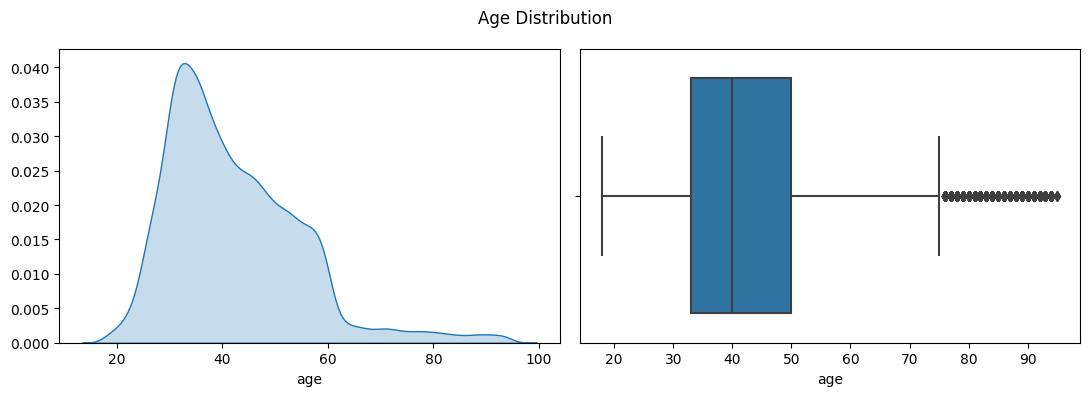

In [9]:
# Checking Age Distribution

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(11, 4))

# KDE plot
sns.kdeplot(data=train_data, x='age', ax=ax[0], fill = True)
ax[0].set_ylabel('')

# Boxplot
sns.boxplot(data=train_data, x='age', ax=ax[1])

# Set main title for all subplots
plt.suptitle('Age Distribution')

plt.tight_layout()
plt.show()

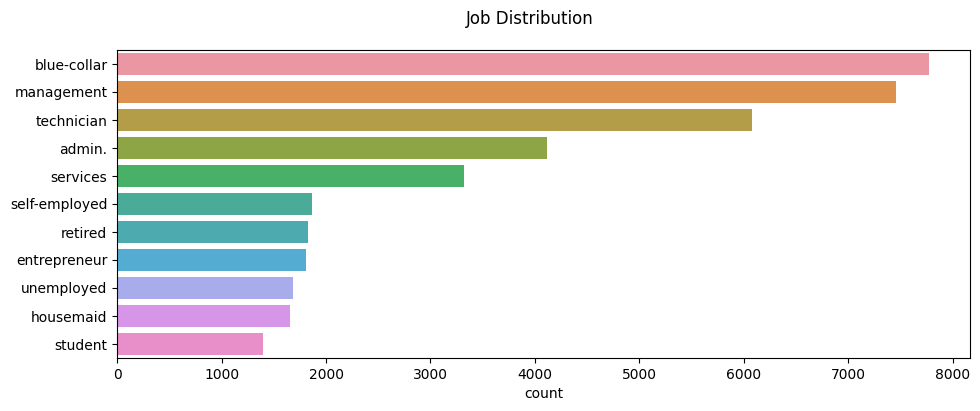

In [10]:
# Checking job Distribution

# Get the order of categories
order = train_data['job'].value_counts().index

# Set figure size
plt.figure(figsize=(11, 4))

# Create countplot
sns.countplot(data=train_data, y='job', order=order).set_ylabel('')

# Set main title for all subplots
plt.suptitle('Job Distribution')

plt.show()

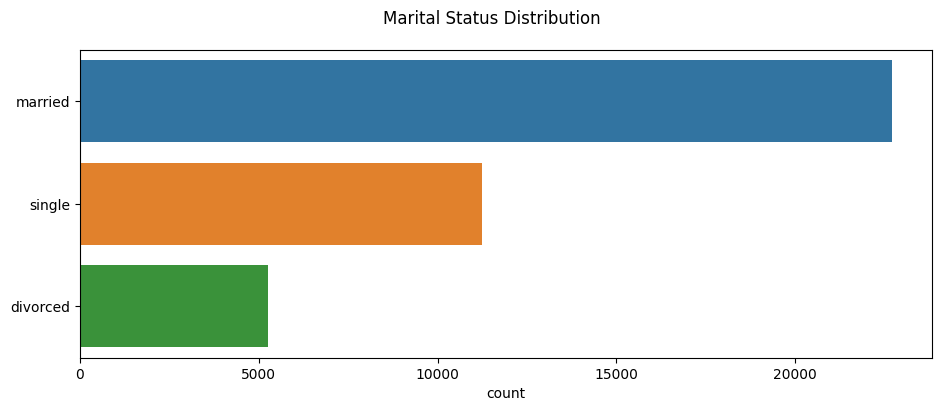

In [11]:
# Checking Marital Status Distribution

# Get the order of categories
order = train_data['marital'].value_counts().index

# Set figure size
plt.figure(figsize=(11, 4))

# Create countplot
sns.countplot(data=train_data, y='marital', order=order).set_ylabel('')

# Set main title for all subplots
plt.suptitle('Marital Status Distribution')

plt.show()

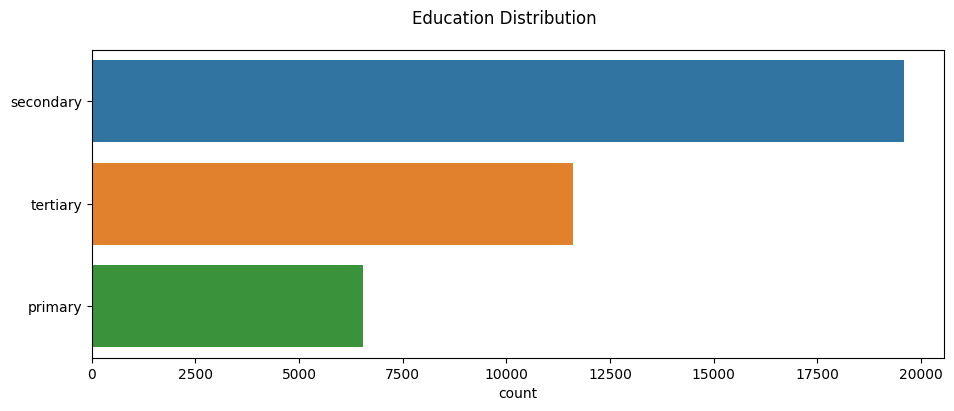

In [12]:
# Checking Educational Qualification Distribution

# Get the order of categories
order = train_data['education'].value_counts().index

# Set figure size
plt.figure(figsize=(11, 4))

# Create countplot
sns.countplot(data=train_data, y='education', order=order).set_ylabel('')

# Set main title for all subplots
plt.suptitle('Education Distribution')

plt.show()

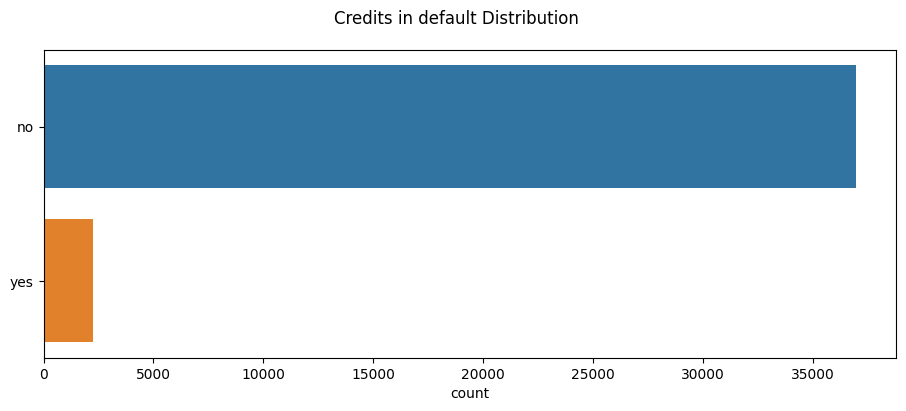

In [13]:
# Checking Credit default Distribution

# Get the order of categories
order = train_data['default'].value_counts().index

# Set figure size
plt.figure(figsize=(11, 4))

# Create countplot
sns.countplot(data=train_data, y='default', order=order).set_ylabel('')

# Set main title for all subplots
plt.suptitle('Credits in default Distribution')

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


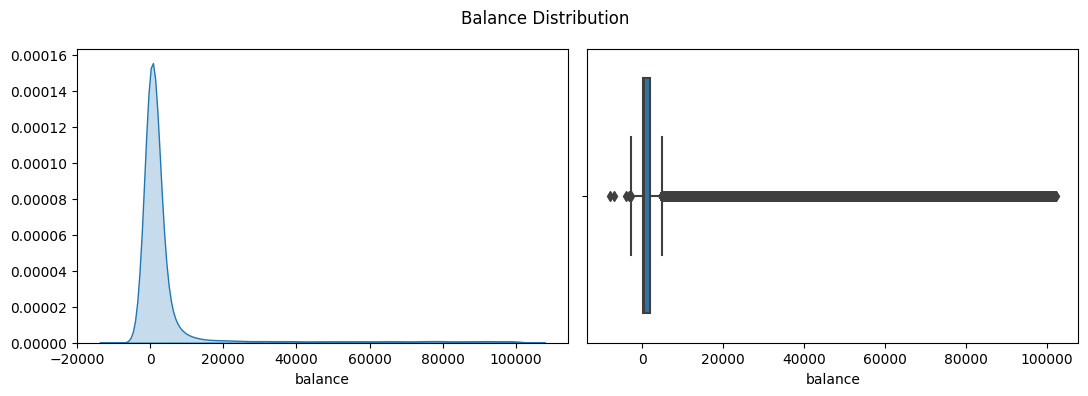

In [14]:
# Checking Balance Distribution

fig, ax = plt.subplots(1, 2, figsize=(11, 4))

# KDE plot
sns.kdeplot(data=train_data, x='balance', ax=ax[0], fill = True)
ax[0].set_ylabel('')

# Boxplot
sns.boxplot(data=train_data, x='balance', ax=ax[1])

# Set main title for all subplots
plt.suptitle('Balance Distribution')

plt.tight_layout()
plt.show()

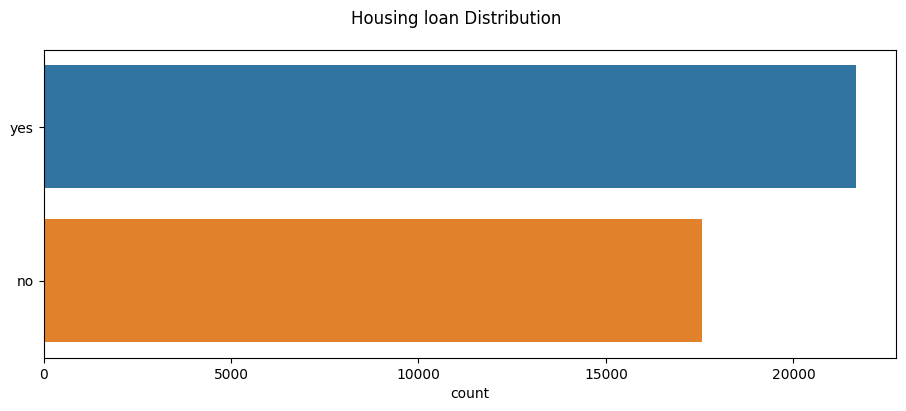

In [15]:
# Checking Housing Loan Status Distribution

# Get the order of categories
order = train_data['housing'].value_counts().index

# Set figure size
plt.figure(figsize=(11, 4))

# Create countplot
sns.countplot(data=train_data, y='housing', order=order).set_ylabel('')

# Set main title for all subplots
plt.suptitle('Housing loan Distribution')

plt.show()

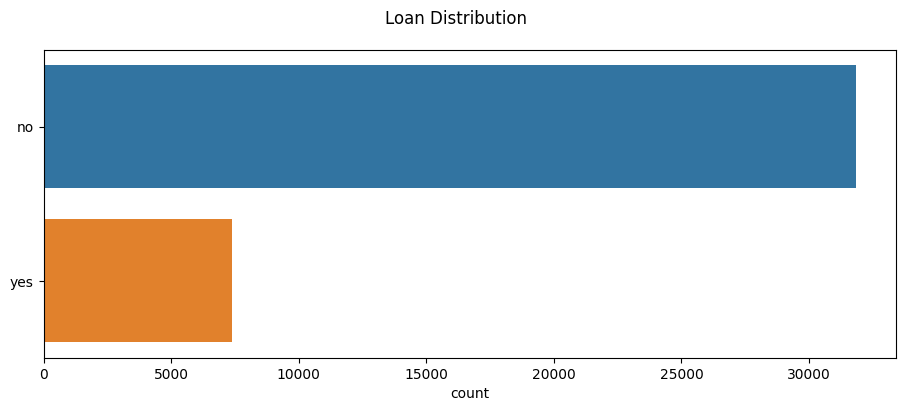

In [16]:
# Checking Loan Status Distribution

# Get the order of categories
order = train_data['loan'].value_counts().index

# Set figure size
plt.figure(figsize=(11, 4))

# Create countplot
sns.countplot(data=train_data, y='loan', order=order).set_ylabel('')

# Set main title for all subplots
plt.suptitle('Loan Distribution')

plt.show()

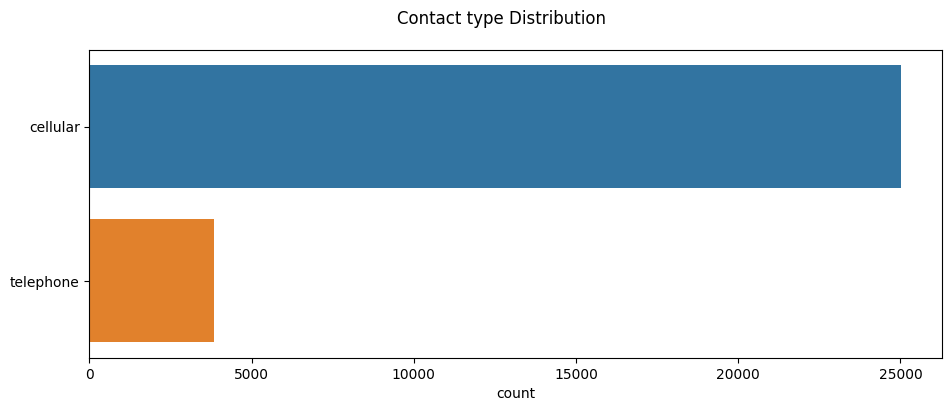

In [17]:
# Checking Contact Type Distribution

# Get the order of categories
order = train_data['contact'].value_counts().index

# Set figure size
plt.figure(figsize=(11, 4))

# Create countplot
sns.countplot(data=train_data, y='contact', order=order).set_ylabel('')

# Set main title for all subplots
plt.suptitle('Contact type Distribution')

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


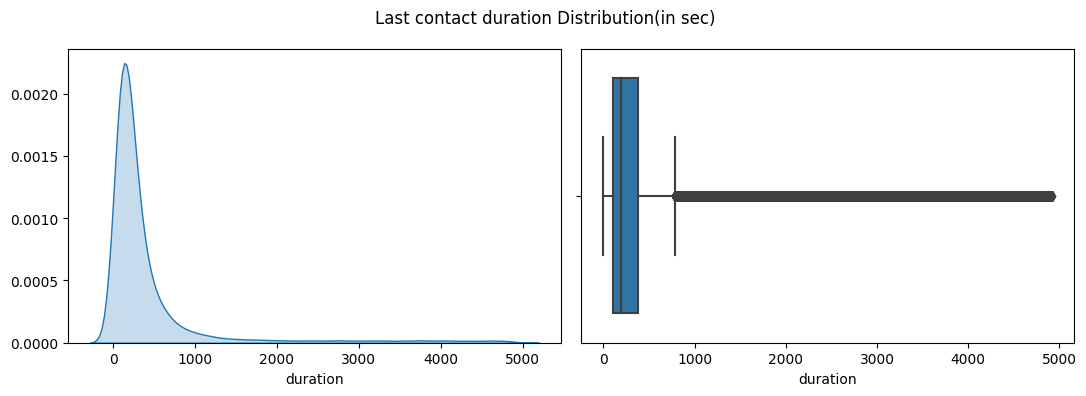

In [18]:
# Checking Contact Duration Distribution

fig, ax = plt.subplots(1, 2, figsize=(11, 4))

# KDE plot
sns.kdeplot(data=train_data, x='duration', ax=ax[0], fill = True)
ax[0].set_ylabel('')

# Boxplot
sns.boxplot(data=train_data, x='duration', ax=ax[1])

# Set main title for all subplots
plt.suptitle('Last contact duration Distribution(in sec)')

plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


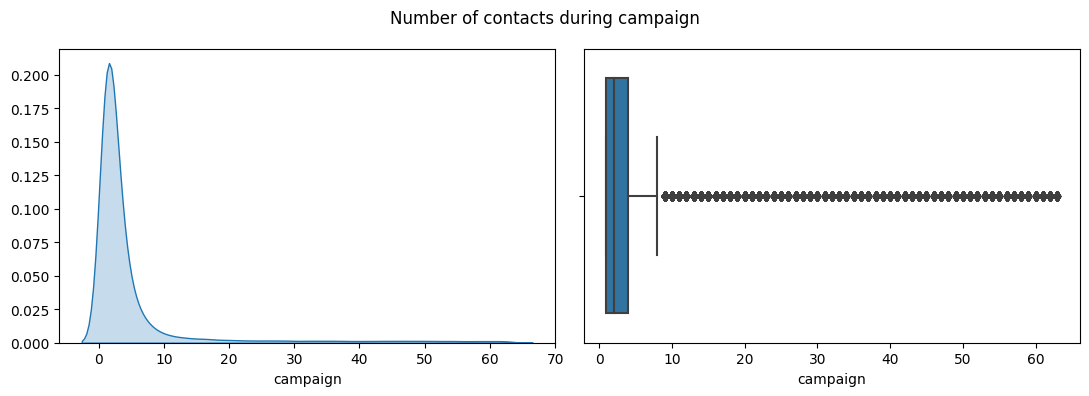

In [19]:
# Checking Number of contacts during campaign Distribution

fig, ax = plt.subplots(1, 2, figsize=(11, 4))

# KDE plot
sns.kdeplot(data=train_data, x='campaign', ax=ax[0], fill = True)
ax[0].set_ylabel('')

# Boxplot
sns.boxplot(data=train_data, x='campaign', ax=ax[1])

# Set main title for all subplots
plt.suptitle('Number of contacts during campaign')

plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


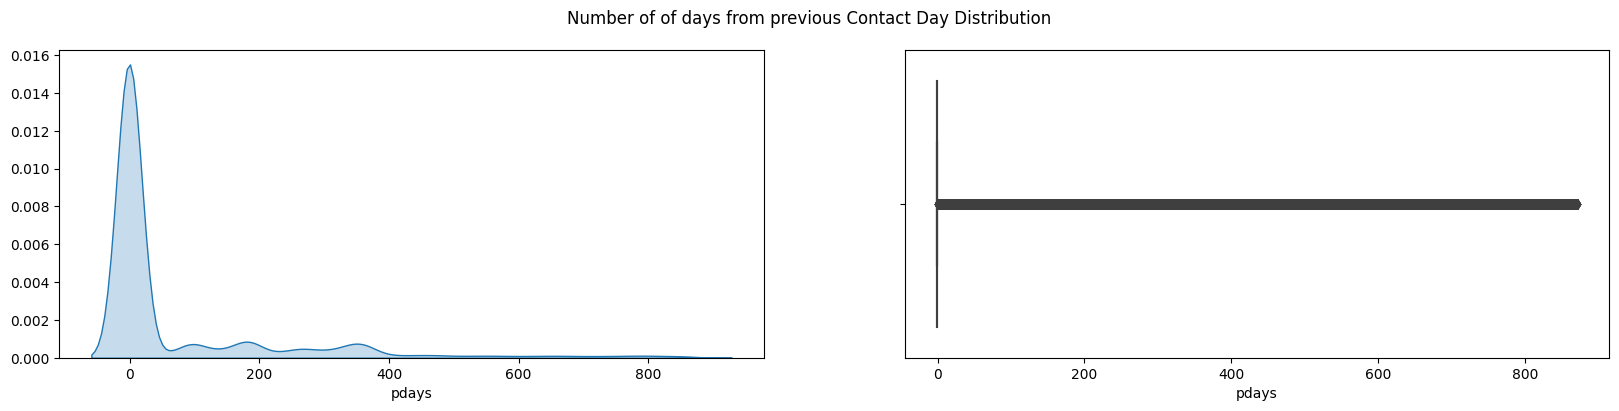

In [20]:
# Checking no. of days from previous contact day Distribution

fig, ax = plt.subplots(1, 2, figsize=(20, 4))

# KDE plot
sns.kdeplot(data=train_data, x='pdays', ax=ax[0], fill = True)
ax[0].set_ylabel('')

# Boxplot
sns.boxplot(data=train_data, x='pdays', ax=ax[1])

# Set main title for all subplots
plt.suptitle('Number of of days from previous Contact Day Distribution')

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


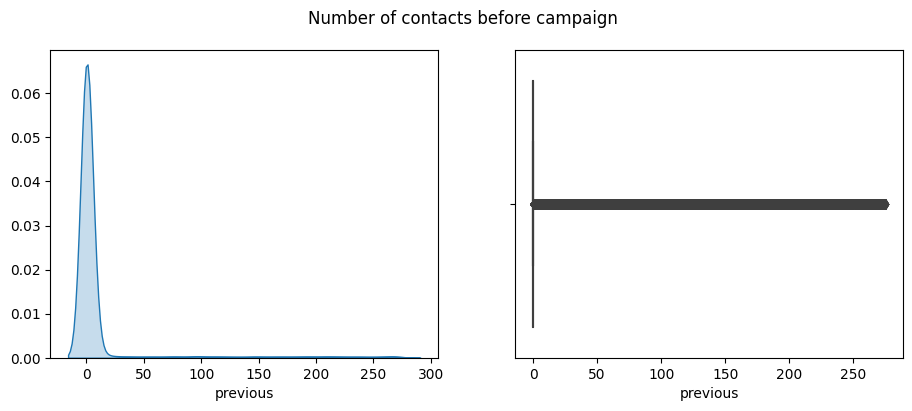

In [21]:
# Checking campaign Distribution

fig, ax = plt.subplots(1, 2, figsize=(11, 4))

# KDE plot
sns.kdeplot(data=train_data, x='previous', ax=ax[0], fill = True)
ax[0].set_ylabel('')

# Boxplot
sns.boxplot(data=train_data, x='previous', ax=ax[1])

# Set main title for all subplots
plt.suptitle('Number of contacts before campaign')

plt.show()

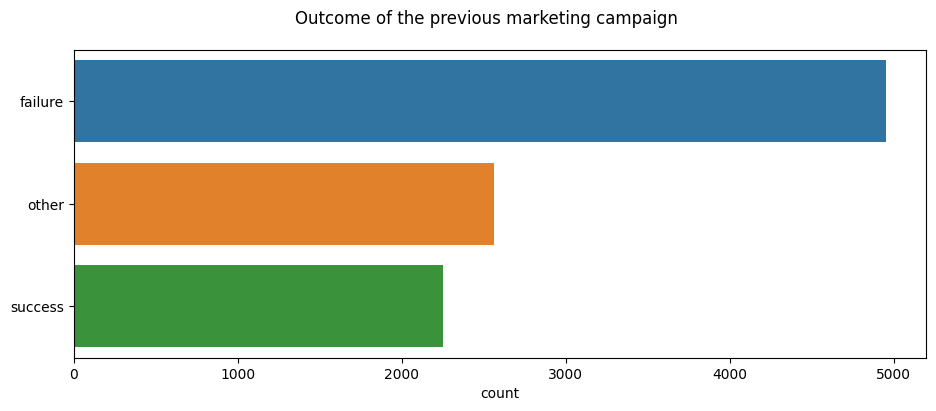

In [22]:
# Checking outcome Distribution

# Get the order of categories
order = train_data['poutcome'].value_counts().index

# Set figure size
plt.figure(figsize=(11, 4))

# Create countplot
sns.countplot(data=train_data, y='poutcome', order=order).set_ylabel('')

# Set main title for all subplots
plt.suptitle('Outcome of the previous marketing campaign')

plt.show()

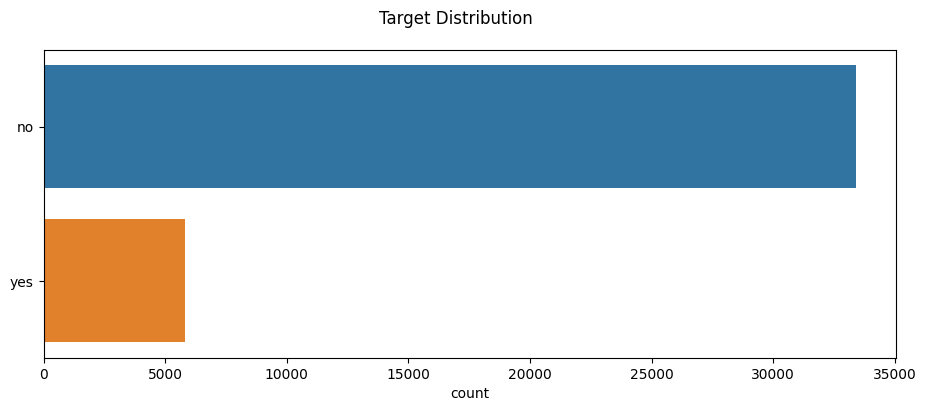

In [23]:
# Checking Target Distribution

# Get the order of categories
order = train_data['target'].value_counts().index

# Set figure size
plt.figure(figsize=(11, 4))

# Create countplot
sns.countplot(data=train_data, y='target', order=order).set_ylabel('')

# Set main title for all subplots
plt.suptitle('Target Distribution')

plt.show()

## Count Plot of the Target Variable

The count plot for the target variable **`target`** is shown above:

### Observations:
1. The dataset is imbalanced:
   - **"Yes"**: approx. 15% of the total records.
   - **"No"**: approx. 85% of the total records.
2. Imbalanced classes could lead to biased predictions, favoring the majority class.

### Actions Taken:
- Instead of oversampling or undersampling the data, we addressed the imbalance by using the scale_pos_weight parameter in the training process of the model.
- `scale_pos_weight` = (`Number of Negative Samples`)/(`Number of Positive Samples`) which is in the training data is `5.7291916938390255`. 

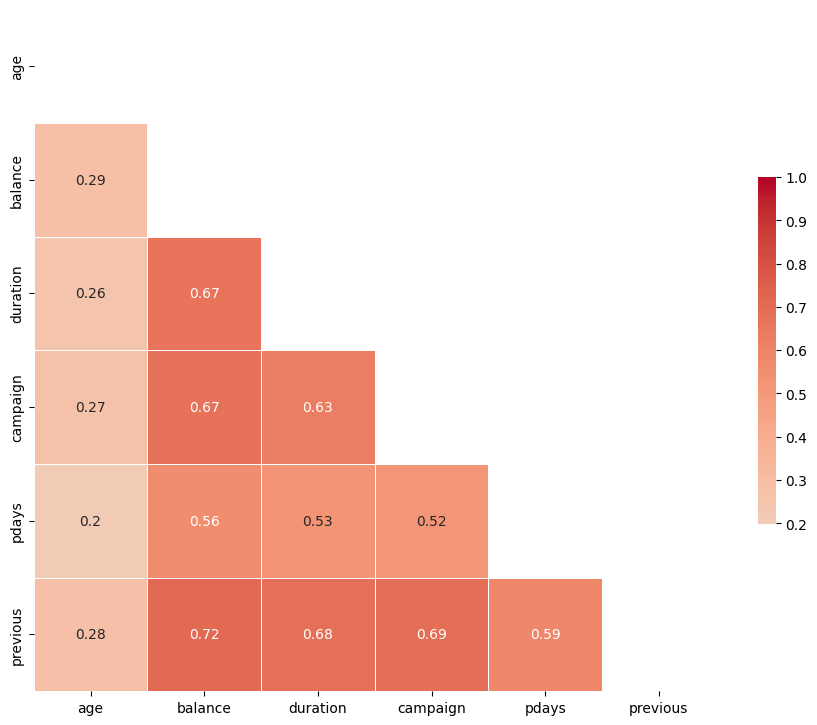

In [24]:
# Checking correlation

# Select numerical columns
numerical_cols = train_data.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix
corr = train_data[numerical_cols].corr()

# Mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

plt.show()

## Correlation Analysis

### Key Insights:
1. **Overall Relationships**:
   - The correlation matrix reveals weak, and negligible relationships between variables.
   - Variables with weak positive/negative correlation may not be closely related.

2. **Notable Observations**:
   - Strong correlations between features may indicate redundancy.
   - Negative correlations might suggest inverse dependencies, useful for predictive modeling.

### Visualization:
- The correlation heatmap highlights relationships:
  - Darker colors ndicate stronger positive/negative correlations.
  - Lighter colors indicate weaker relationships.

### Recommendations:
1. **Feature Selection**:
   - Focus on weakly correlated variables for exploratory analysis.

2. **Further Exploration**:
   - Remove any outliers and check again for correlation analysis.


In [25]:
from scipy.stats import zscore

# Detecting outliers

# Selecting only numeric columns from df
numerical_df = train_data.select_dtypes(include=[np.number])

# Calculating z-scores
z_scores = numerical_df.apply(zscore)

# Get rows where any column has an absolute z-score > 3
outlier_rows = train_data[(np.abs(z_scores) > 3).any(axis=1)]

# Print outlier rows
outlier_rows

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
8,2008-12-13,38,unemployed,divorced,primary,yes,14123,yes,yes,cellular,2370,4,852,4,other,no
12,2009-12-28,38,entrepreneur,divorced,tertiary,yes,50281,no,yes,cellular,4575,45,661,143,failure,yes
19,2009-10-30,86,student,divorced,primary,yes,22272,no,no,cellular,283,44,599,234,success,no
53,2008-01-02,63,entrepreneur,divorced,tertiary,no,93719,no,yes,cellular,2374,61,187,225,other,yes
62,2009-10-01,19,unemployed,married,secondary,yes,10023,no,no,telephone,3380,58,610,219,other,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39145,2010-03-25,68,housemaid,married,primary,no,18779,yes,no,cellular,2874,32,333,81,success,yes
39147,2008-12-01,91,unemployed,divorced,primary,yes,16507,no,yes,cellular,3182,31,459,22,other,no
39149,2008-12-17,86,entrepreneur,divorced,tertiary,no,100094,yes,no,cellular,1596,1,735,60,other,yes
39190,2008-10-21,54,entrepreneur,married,primary,no,10863,yes,yes,telephone,1746,45,98,238,other,no


## Outlier Detection and Removal

Outliers are extreme data points that deviate significantly from the majority of the dataset. They can:
- Skew statistical summaries such as mean and standard deviation.
- Affect model performance by introducing noise.

### Methods Used for Outlier Detection
1. **Visualization Techniques**:
   - **Box Plot**: Highlighted potential outliers beyond the whiskers.
   - **Scatter Plot**: Revealed extreme values in relationships between variables.
2. **Statistical Methods**:
   - **Z-Score**: Data points with a Z-score > 3 or < -3 were considered outliers.
   - **Interquartile Range (IQR)**:
     - Formula: IQR = Q3 - Q1
     - Lower Bound: Q1 - 1.5 * IQR
     - Upper Bound: Q3 + 1.5 * IQR


### Outliers Detected

We have found out that 3222 rows in our training dataset are outliers which can create potential noise in our model training leading to overfitting of the model as the outliers consists of approximately 10% of the total data rows in the train dataset.

In [26]:
# removing outliers

train_data = train_data.drop(outlier_rows.index)

In [27]:
# Define features and target
X_train = train_data.drop(['target'], axis=1)
y_train = train_data['target']

In [28]:
from sklearn.preprocessing import LabelEncoder

# Encoding target column
le_target = LabelEncoder()
y_train = le_target.fit_transform(y_train)

In [29]:
all_data = pd.concat([X_train, test_data], axis=0, ignore_index=True)

from sklearn.impute import SimpleImputer

# Impute 'job' with most frequent value
imputer = SimpleImputer(strategy='most_frequent')
all_data['job'] = imputer.fit_transform(all_data[['job']]).ravel()

# Impute 'education', 'contact', and 'poutcome' with 'unknown'
imputer = SimpleImputer(strategy='constant', fill_value='unknown')
for column in ['education', 'contact', 'poutcome']:
    all_data[column] = imputer.fit_transform(all_data[[column]]).ravel()

In [30]:
# Feature engineering
def feature_engineering(df):
    # Convert date to datetime
    df['last contact date'] = pd.to_datetime(df['last contact date'])
    
    # Extract date features
    df['contact_month'] = df['last contact date'].dt.month
    df['contact_day'] = df['last contact date'].dt.day
    df['contact_dayofweek'] = df['last contact date'].dt.dayofweek
    
    # Create age groups
    df['age_group'] = pd.cut(df['age'], bins=[0, 20, 30, 40, 50, 60, 100], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '60+'])
    
    # Create balance groups
    df['balance_group'] = pd.qcut(df['balance'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
    
    # Drop original date column
    df = df.drop('last contact date', axis=1)
    
    return df

all_data = feature_engineering(all_data)

In [31]:
# Preprocess the data

# Encoding categorical columns
le = LabelEncoder()
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'age_group', 'balance_group']

for col in categorical_columns:
    all_data[col] = le.fit_transform(all_data[col].astype(str))

In [32]:
# Removing 'pdays' column

all_data.drop(['pdays'], axis=1, inplace=True)

from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
numerical_columns = ['age', 'balance', 'duration', 'campaign', 'previous']
all_data[numerical_columns] = scaler.fit_transform(all_data[numerical_columns])

In [33]:
# split the train and test data after feature engineering

X_train = all_data[:len(X_train)]
X_test = all_data[len(X_train):]

In [34]:
# Import necessary libraries
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.02, 0.05, 0.1],
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0.5, 1, 1.5, 2],
    'scale_pos_weight': [2.86459584691951275, 5.7291916938390255, 8.59378754075853825]  # Adjust for imbalance
}

# Initialize the XGBClassifier
xgb = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Perform Randomized Search with Cross Validation
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=100,  # Number of combinations to try
    scoring='f1',  # Optimize for F1-Score
    cv=3,  # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters and evaluation
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.02, max_depth=3, min_child_weight=7, n_estimators=300, reg_alpha=1, reg_lambda=1.5, scale_pos_weight=8.59378754075854, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=9, min_child_weight=5, n_estimators=400, reg_alpha=1, reg_lambda=1.5, scale_pos_weight=5.7291916938390255, subsample=1.0; total time=   1.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=100, reg_alpha=0.5, reg_lambda=0.5, scale_pos_weight=8.59378754075854, subsample=0.6; total time=   0.9s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0.1, reg_lambda=2, scale_pos_weight=8.59378754075854, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.02, max_depth=3, min_child_weight

In [35]:
# Train Test Split for creating and getting insight from model prediction with confusion matrix

from sklearn.model_selection import train_test_split

X_train_subset, X_eval, y_train_subset, y_eval = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

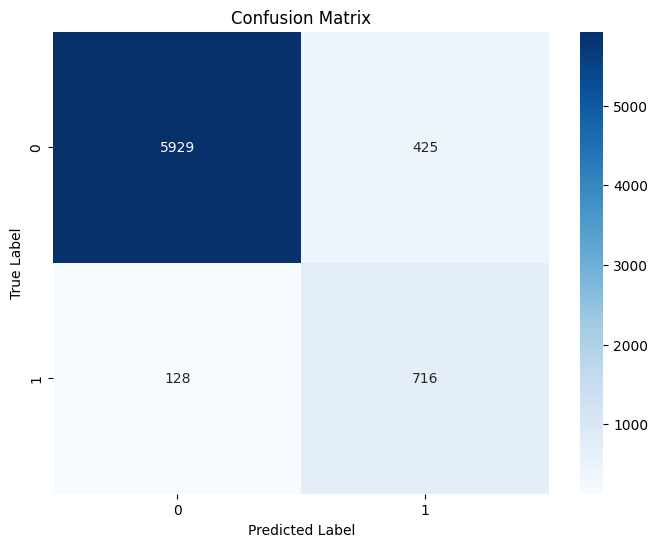

In [36]:
# Checking Confusion Matrix

from sklearn.metrics import confusion_matrix

y_pred_eval = best_model.predict(X_eval)

cm = confusion_matrix(y_eval, y_pred_eval)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Confusion Matrix

### Insights

1. From the confusion matrix we can see that the approximately 10% of True(Positive - 1) values are predicted as False(Negative - 0).
2. And the approximately 12% of the False(Negative - 0) values are predicted as True(Positive - 1).

**Note:** From these results we can say that our model has an accuracy of about approximately 90%.

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate evaluation metrics
accuracy = accuracy_score(y_eval, y_pred_eval)
precision = precision_score(y_eval, y_pred_eval)
recall = recall_score(y_eval, y_pred_eval)
f1 = f1_score(y_eval, y_pred_eval)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Accuracy: 0.9232
Precision: 0.6275
Recall: 0.8483
F1-Score: 0.7214


In [38]:
# Create the submission file
submission = pd.DataFrame({'id': range(len(y_pred)), 'target': le_target.inverse_transform(y_pred)})
submission.to_csv('submission.csv', index=False)
print("Submission file created: submission.csv")

Submission file created: submission.csv


## Creating Submission File (`submission.csv`)

1. **Inversing the `target - column`** from `1` and `0` to `yes` and `no` respectively.
2. **Binding target with `id - column`** 0 - 9999 (`10000 rows`).